In [14]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import ast

### live recording

In [15]:
from scipy.io.wavfile import write

fs = 44100  # Sample rate
seconds = 5  # Duration of recording

myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()  # Wait until recording is finished
write('OUTPUT.wav', fs, myrecording)  # Save as WAV file

## Taking input

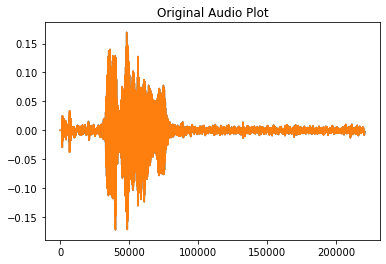

In [16]:
fs, data = wavfile.read('OUTPUT.wav')
plt.plot(data)            # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")
data_1 = np.asarray(data, dtype = np.int32)

## Playing that sound

In [17]:
sd.play(data, fs)

## Generating public and private keys for RSA algorithm


Select two prime no's. Suppose P = 53 and Q = 59.

Now First part of the Public key : n = P*Q = 3127.

We also need a small exponent say e : But e Must be

1) An integer.

2) Not be a factor of n.

3) 1 < e < Φ(n) [Φ(n) is discussed below], 
Let us now consider it to be equal to 3.

Our Public Key is made of n and e

1) We need to calculate Φ(n):

Such that Φ(n) = (P-1)(Q-1)     
  so,  Φ(n) = 3016


2) Now calculate Private Key, d :

d = (k*Φ(n) + 1) / e for some integer k
For k = 2, value of d is 2011.


In [18]:
p1 = int(input("Enter a prime number: "))#53
p2 = int(input("Enter another prime number: "))#59

n = p1*p2
print("n = p1*p2 = ",n)

Enter a prime number: 53
Enter another prime number: 59
n = p1*p2 =  3127


In [19]:
e = int(input("Enter a small, odd number, co-prime with n: "))#1
k = int(input("Enter value of k:"))#31

Enter a small, odd number, co-prime with n: 1
Enter value of k:31


In [20]:
phi = (p1-1)*(p2-1)
print("phi = ",phi)
d = int((k*phi+1)/e)
#d = ((e**(-1))%phi)
print("d= ",d)

phi =  3016
d=  93497


In [21]:
public_key = n,e
private_key = n,d

print("Public Key = ", public_key)
print("Private Key = ",private_key)


Public Key =  (3127, 1)
Private Key =  (3127, 93497)


## Encrpytion of audio file

Text(0.5, 1.0, 'Encrypted Audio Plot')

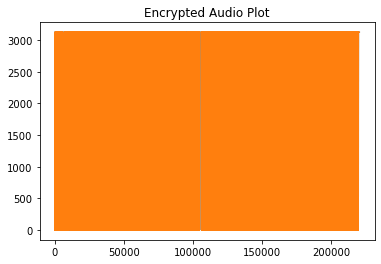

In [22]:
encrypted = (data**e)%n
plt.plot(encrypted)
plt.title("Encrypted Audio Plot")

## Saving the saved file

In [23]:
data1 = np.asarray(encrypted, dtype=np.int16)
wavfile.write('encrypted_rsa.wav', fs, data1)
print("A file titled 'encrypted_rsa.wav' is generated which is the encrypted audio to be communicated")

A file titled 'encrypted_rsa.wav' is generated which is the encrypted audio to be communicated


## Loading and decrypting

Text(0.5, 1.0, 'Encrypted Audio Plot')

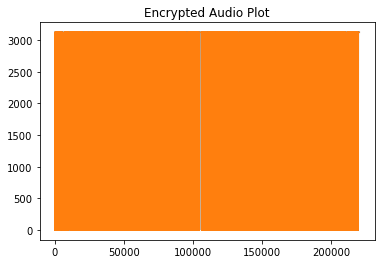

In [24]:
fs, Data = wavfile.read('encrypted_rsa.wav')
plt.plot(Data)
plt.title("Encrypted Audio Plot")

## Decryption of data

Text(0.5, 1.0, 'Decrypted Audio Plot')

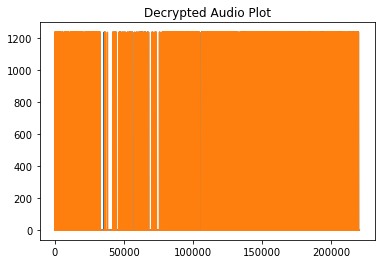

In [25]:
decrypted = ((Data)**d)%n
plt.plot(decrypted)
plt.title('Decrypted Audio Plot')

In [27]:
sd.play(data1, fs)